In [1]:
import tools
import cartesian
import racks
import calibration
import samples
import json
import importlib
import random as rnd
import time
import low_level_comm as llc

In [2]:
llc.listSerialPorts()

['COM3', 'COM6', 'COM10', 'COM14']

In [3]:
ar = cartesian.arnie(cartesian_port="COM10", docker_port="COM6")

In [4]:
ar.home()

In [5]:
stp = tools.stationary_touch_probe(ar)

ERROR:root:matchPortsWithDevices(): could not execute finiding device in list.
ERROR:root:matchPortsWithDevices(): Provided patterns_list: ['stationary touch probe']
ERROR:root:None


In [6]:
#gr = tools.mobile_gripper.getTool(robot=ar)
gr = tools.mobile_gripper(robot=ar)

In [7]:
calibration.calibrateToolCustomPoints(tool=gr, stationary_probe=stp)

(94.53, 67.275, 515.65)

In [6]:
ar.move(x=200, y=350, z=100)

In [4]:
ar.move(y=400)

In [31]:
gr.operateGripper(10)

In [73]:
gripper_diam_vs_angle = {
    0: 1.33*2,
    40: 6.51*2,
    80: 11.40*2,
    120: 15.77*2,
    160: 20.19*2,
}

In [52]:
ar.move(x=870, y=290)

In [70]:
ar.move(z=594)

In [71]:
ar.move(z=580)

In [72]:
gr.operateGripper(0)

# Linear fitting

In [74]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\sergi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
df = pd.DataFrame({'diameter': gripper_diam_vs_angle})

In [78]:
df = df.reset_index()

In [84]:
df = df.rename(columns={"index": "angle"})

In [85]:
df

,angle,diameter
0,0,2.66
1,40,13.02
2,80,22.80
3,120,31.54
4,160,40.38


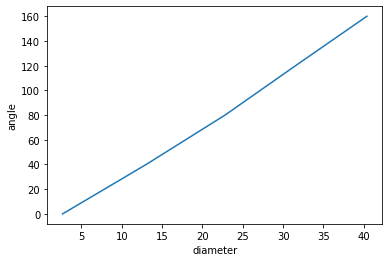

In [87]:
ax = sns.lineplot(x="diameter", y="angle", ci=68, data=df)

In [88]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

In [89]:
popt, pcov = curve_fit(f, df.diameter, df.angle) # your data x, y to fit

In [90]:
k = popt[0]
b = popt[1]

In [91]:
k, b

(4.251006657983163, -13.862227073390708)

In [92]:
0 * k + b

-13.862227073390708

In [93]:
10.8*k+b

32.04864483282746

In [94]:
31*k+b

117.91897932408735

In [13]:
gr.setAngleToDiameterConstants(slope=4.251006657983163, intercept=-13.862227073390708)

In [17]:
ar.move(x=600, y=0, z=300)

In [11]:
ar.move(x=0, y=400)

In [7]:
for i in range(10):
    a = rnd.random()*100
    gr.operateGripper(a)
gr.operateGripper(0)

In [89]:
gr.returnTool()

# Manually finding gripping parameters

In [7]:
ar.move(z=400)

In [8]:
r50 = racks.rack(rack_name='50mL_rack_1', rack_type='50mL')

In [9]:
t50 = samples.sample(sample_name='t50_1', sample_type='50mL_tube')

In [10]:
t50.place(r50, 2, 0)

In [11]:
gr.getToSample(t50)

In [17]:
t50.getSampleTopZ(gr)

513.05

In [18]:
t50.sampleVolToZ(volume=50000, tool=gr)

527.05

In [56]:
gr.toDiameter(35, powerdown=False)

In [55]:
ar.move(z=527.05)

In [53]:
gr.toDiameter(28, powerdown=False)

In [57]:
ar.move(z=400)

In [58]:
ep1 = racks.rack(rack_name='eppendorf_1', rack_type='eppendorf')

In [59]:
t_ep = samples.sample(sample_name='t_ep_1', sample_type='eppendorf_tube')

In [60]:
t_ep.place(ep1, 0, 3)

In [67]:
gr.getToSample(t_ep)

In [69]:
t_ep.sampleVolToZ(volume=1000, tool=gr)

525.8

In [88]:
ar.move(z=500)

In [87]:
gr.toDiameter(14, powerdown=False)

In [86]:
ar.move(z=525.8)

In [84]:
gr.toDiameter(10, powerdown=False)

In [37]:
ar.home()

In [2]:
ep1 = racks.rack(rack_name='eppendorf_1', rack_type='eppendorf')

In [3]:
t_ep = samples.sample(sample_name='t_ep_1', sample_type='eppendorf_tube')

In [4]:
t_ep.place(ep1, 0, 3)

In [9]:
t_ep.getDepthFromVolume(1800)

1.6

# Testing grabSample function

In [7]:
gr = tools.mobile_gripper.getTool(robot=ar)

In [8]:
calibration.calibrateToolCustomPoints(tool=gr, stationary_probe=stp)

(93.93, 67.4, 515.85)

In [9]:
ar.move(z=300)

In [60]:
importlib.reload(samples)

<module 'samples' from 'c:\\Users\\sergi\\Dropbox\\workspace\\arnielib\\samples.py'>

In [10]:
ep1 = racks.rack(rack_name='eppendorf_1', rack_type='eppendorf')

In [11]:
t_ep = samples.sample(sample_name='t_ep_1', sample_type='eppendorf_tube')

In [12]:
t_ep.place(ep1, 0, 3)

In [13]:
gr.grabSample(t_ep)

In [17]:
ar.move(z=400)

In [15]:
gr.placeSample(rack=ep1, column=2, row=1)

UnboundLocalError: local variable 'sample' referenced before assignment

In [15]:
r50 = racks.rack(rack_name='50mL_rack_1', rack_type='50mL')

In [16]:
t50 = samples.sample(sample_name='t50_1', sample_type='50mL_tube')

In [17]:
t50.place(r50, 2, 0)

In [24]:
gr.grabSample(t50)

In [16]:
gr.operateGripper(150)

In [18]:
gr.operateGripper(0)

In [19]:
ar.openTool()

In [68]:
t_ep.sampleVolToZ(volume=1700, tool=gr)

515.8

In [65]:
t_ep.getDepthFromVolume(1600)

4.4

In [71]:
max_vol = t_ep.getMaxVolume()
max_vol

1700.0

In [73]:
t_ep.getDepthFromVolume(max_vol)

3.0

In [74]:
ep1.calcWorkingPosition(0, 3, gr)

(32.655, 436.9, 527.0)

In [75]:
t_ep.params['sample_top_dz']

{'eppendorf': 14.2, 'eppendorf_magnetics': 10.5}

In [72]:
t_ep.sampleVolToZ(volume=max_vol, tool=gr)

515.8

In [67]:
gr.getToSample(t_ep)

In [15]:
gr.operateGripper(100)

In [16]:
ar.move(z=400)

In [17]:
gr.operateGripper(0)

In [79]:
gr.returnTool()

In [84]:
ar.openTool()

In [25]:
ar.move(z=300)

In [6]:
p1000 = tools.pipettor.getTool(robot=ar, tool_name='p1000_tool')

In [7]:
xt, yt, zt = calibration.calibrateTool(p1000, stp)

In [26]:
p1000.getToSample(t_ep)

In [27]:
ep1.calcWorkingPosition(0, 3, p1000)

(31.174999999999997, 436.3499999999999, 445.5)

In [28]:
ar.move(z=445.5)

In [19]:
r50.calcWorkingPosition(2, 0, p1000)

(588.55, 262.34999999999997, 445.75)

In [20]:
p1000.getToSample(t50)

In [21]:
ar.move(z=445.75)

In [30]:
ar.move(z=0)

In [31]:
ar.move(x=0)

In [32]:
p1000.switchModeToDropTip()

In [33]:
p1000.switchModeToNormal()

In [35]:
p1000.movePlunger(-1)

In [36]:
p1000.returnTool()

# Working on placing sample

In [6]:
gr = tools.mobile_gripper.getTool(robot=ar)
#gr = mobile_gripper(robot=ar)

In [7]:
calibration.calibrateToolCustomPoints(tool=gr, stationary_probe=stp)

(94.48, 66.6, 515.65)

In [8]:
ar.move(z=300)

In [9]:
ep1 = racks.rack(rack_name='eppendorf_1', rack_type='eppendorf')

In [10]:
t_ep = samples.sample(sample_name='t_ep_1', sample_type='eppendorf_tube')

In [11]:
t_ep.place(ep1, 0, 3)

In [12]:
gr.grabSample(t_ep)

In [13]:
t_ep = gr.placeSample(ep1, 3, 0)

In [14]:
t_ep.sample_data

{'sample_name': 't_ep_1',
 'sample_type': 'eppendorf_tube',
 'rack': <racks.rack at 0x23fb7bd6cc8>,
 'x_well': 3,
 'y_well': 0}

In [15]:
magep1 = racks.rack(rack_name='eppendorf_magnetic_1', rack_type='eppendorf_magnetic')

In [16]:
gr.grabSample(t_ep)

In [17]:
t_ep = gr.placeSample(magep1, 0, 0)

In [13]:
ar.getAxisPosition(axis='z')

466.15

In [17]:
ep1.calcWorkingPosition(well_col=2, well_row=1, tool=gr)

(67.055, 390.0999999999999, 497.34999999999997)

In [16]:
gr.getToPosition(ep1, 2, 1)

In [18]:
z_sample_protruding = gr.sample.getSampleRemainingLength(gr.sample.sample_engaged_dz)

In [19]:
z_sample_protruding

36.45

In [20]:
zfin = 497.35 + z_sample_protruding

In [23]:
ar.move(z=497.35+z_sample_protruding)

In [30]:
gr.sample.disengage()
gr.gripper_has_something = False
gr.added_z_length = 0
gr.sample=None

In [24]:
ar.move(z=0)

In [25]:
ar.move(x=0, y=0)

In [27]:
gr.operateGripper(0)

In [32]:
gr.getToPosition(rack=ep1, column=2, row=1)

In [38]:
ar.move(x=500, y=0)

In [10]:
ar.home()

In [9]:
gr.returnTool()